Explore the global terms counts generated by Jared.
The aim is to define a suitable cut-off frequency which will decide whether a word belongs to the vocabulary or not.


In [1]:
import numpy as np
import pylab as plt
import os,sys
import pandas as pd
import glob
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import pdist,cdist
%matplotlib inline  
%load_ext autoreload
%autoreload 2

## add src-path
src_dir = os.path.abspath(os.path.join(os.pardir,os.pardir,'src'))
sys.path[0] = src_dir

from common.stats import *

In [2]:
## general path
path_data = os.path.abspath('/scratch2/gerlach/Dropbox (Uzzi Lab)/WoS/wos-text-dynamics-data/d2v-wos')
print(path_data)



/scratch2/gerlach/Dropbox (Uzzi Lab)/WoS/wos-text-dynamics-data/d2v-wos


## datasets as mmep-objects


In [3]:
## the 2D-projections
path_read = os.path.join(path_data,'100-5-5-0')
fname_read = 'doc_features_normed_100-5-5.npy.1M.lv_coords'
filename = os.path.join(path_read,fname_read)
x= (np.loadtxt(filename))
x_2D = x[1:,:]

In [4]:
## the full data at the particular indices
## get the indices
fname_read = 'doc_features_normed_100-5-5.npy.indices_1M'
filename = os.path.join(path_read,fname_read)
with open(filename) as f:
    x=f.readlines()
x_inds = [int(h) for h in x[0].split(',')]


In [5]:
fname_read = 'model_100-5-5.npy.docvecs.doctag_syn0.npy' ## these are the normed vectors
filename = os.path.join(path_read,fname_read)
x1 = np.load(filename,mmap_mode='r')
# x = x1[x_inds]

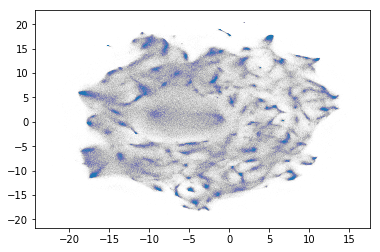

In [87]:
plt.plot(x_2D[:,0],x_2D[:,1],lw=0,marker='o',alpha=0.005,ms=1)

# parameters

In [88]:

N_pairs = 10**4
N =  10**6
metric = 'euclidean'

In [89]:
# np.random.seed(n_seed)
i1,i2=0,0
list_dist_x1 = []
list_dist_x2 = []

for i in range(N_pairs):
    if i%1000==0:
        print(i)
    i1,i2=0,0
    while i1 == i2:
        i1,i2 = np.random.randint(N,size=2)#np.random.choice(N,size=2,replace=False)
        
    ## distance in dataset 2
    vec1,vec2 = x_2D[i1],x_2D[i2]
    s = pdist([vec1,vec2],metric=metric)[0]
#     s = pdist([vec1,vec2],metric='euclidean')[0]
    list_dist_x2 += [s]
    
    ## distance in dataset 1
    vec1,vec2 = x1[x_inds[i1]],x1[x_inds[i2]]
    s = pdist([vec1,vec2],metric=metric)[0]
    list_dist_x1 += [s]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


## histograms and scatter plots

In [98]:
xmin = 0
xmax = 20
arr_bins = np.linspace(xmin,xmax,100)
H1,edges1 = np.histogram(list_dist_x1,bins=arr_bins)
H1 = H1/len(H1)
H1 = np.append(H1,0.0)

H2,edges2 = np.histogram(list_dist_x2,bins=arr_bins)
H2 = H2/len(H2)
H2 = np.append(H2,0.0)

In [99]:
len(H2),len(arr_bins)

(100, 100)

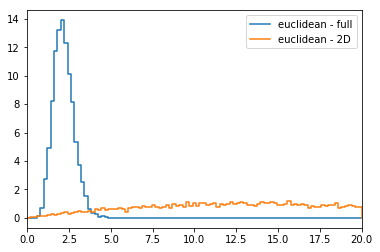

In [100]:
plt.step(arr_bins,H1,where='post',label='%s - full'%(metric))
plt.step(arr_bins,H2,where='post',label='%s - 2D'%(metric))
plt.xlim(xmin,xmax)
plt.legend()

[]

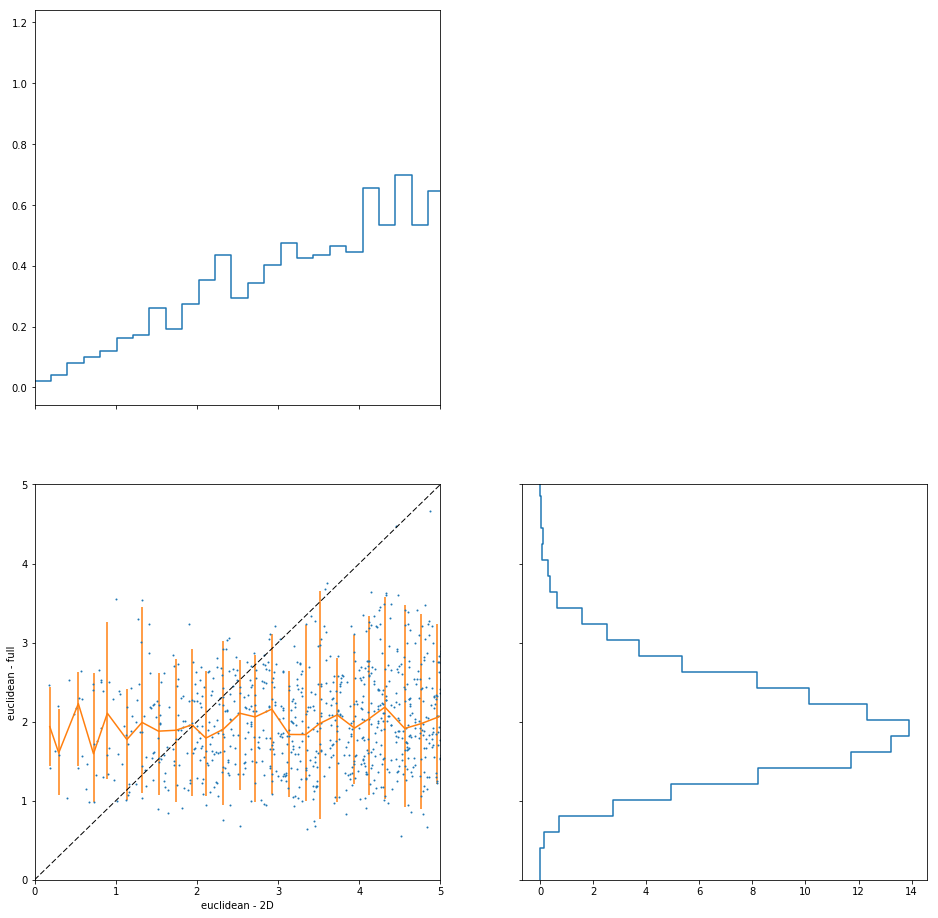

In [111]:
# xmin = 0
# xmax = 1

plt.figure(figsize=(16,16))
ax = plt.subplot(221)
ax.step(arr_bins,H2,where='post',label='%s - 2D'%(metric))
ax.set_xlim(xmin,5)
ax.set_xticklabels([])

ax = plt.subplot(223)
ax.plot(list_dist_x2,list_dist_x1,marker='o',lw=0,ms=1)#,alpha=1.0/N_pairs*10000)
ax.plot([xmin,xmax],[xmin,xmax],lw=1,ms=0,color='black',ls='--')#alpha=1.0/N_pairs*10000)

# arr_bins = np.linspace(xmin,xmax,100)
x_med,y_med,y_err = cond_median(list_dist_x2,list_dist_x1,arr_bins,y_perc = [2.5,97.5])

ax.errorbar(x_med,y_med,yerr=y_err)

ax.set_xlabel('%s - 2D'%(metric))
ax.set_ylabel('%s - full'%(metric))
ax.set_xlim(xmin,5)
ax.set_ylim(xmin,5)

ax = plt.subplot(224)
ax.step(H1,arr_bins,where='post',label='%s - full'%(metric))
ax.set_ylim(xmin,5)
ax.set_yticklabels([])


## correlations

In [112]:
from scipy.stats import pearsonr,kendalltau,spearmanr

In [113]:
pearsonr(list_dist_x1,list_dist_x2)

(0.17882013261291999, 1.234679468633826e-72)

In [114]:
spearmanr(list_dist_x1,list_dist_x2)

SpearmanrResult(correlation=0.1821510827735108, pvalue=2.4281489753587459e-75)

In [115]:
kendalltau(list_dist_x1,list_dist_x2)

KendalltauResult(correlation=0.12286864686468646, pvalue=7.9680140926196571e-76)

In [130]:
# x_med,y_med,C_med = C_running_median(list_dist_x1,list_dist_x2,n_run = int(N_pairs/100))

# plt.plot(x_med,C_med[:,0],marker='o',ms=3,label='rank - correlation')
# plt.plot(x_med,C_med[:,1],marker='x',ms=3,label='p - value')
# plt.legend(bbox_to_anchor=(1,1))

In [131]:
# np.shape(C_med)